In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

from utils import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Đọc dữ liệu từ file zip

In [3]:
def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [5]:
extract_zip('data/raw/label.zip', 'data/root')

In [6]:
len(os.listdir('data/root/'))

20000

# Di chuyển file

In [7]:
root = 'data/root'
# dataPath = 'InkData_line_processed'

In [21]:
set('abc')

{'a', 'b', 'c'}

In [22]:
cnt = 0
char_count = []
len_list = []
size = []
list_str = {}
char_list = set()

for path in os.listdir(root):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/' + path
        labelpath = root + '/' + os.path.splitext(path)[0] + '.txt'

        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()

            # if '-' in content:
            #     print(path)
            char_list.update(set(content))
            # char_count.append(len(content))
        #     len_list.append(len(content.split()))
            
        # if len(content) in range(40, 90):
        # num = len(content)
        # if num in list_str.keys():
        #     list_str[num].append(path)
        # else:
        #     list_str[num] = [path]

        # Đọc img
        # if len(content) in range(40, 100):
        #     img = Image.open(imgpath).convert('L')
        #     img = img.point(lambda p: 255 - p) # chuyển background về màu đen 0

        #     img = utils.cropImg(img)
        #     w, h = img.size
        #     # size.append(img.size)
        #     if w / h < 512/32:
        #         img.show()
        #         print(content)
        #         # print(imgpath)
        #         invalid_img.append(imgpath)
        #         invalid_cnt.append(len(content))
        #         break
        # Di chuyển file------------------------------------------
        # if len(content) in range(51, 96):
        # shutil.copy(imgpath, 'data/4/img') # Di chuyển file 
        # shutil.copy(labelpath, 'data/4/label') # Di chuyển file 

In [26]:
''.join(char_list)

'qŨẾỷĐ:w_TầỎOỳNÐfứFƠÀỐc&ùẵẳ^ặÂè"mẫếŌ6âỰ…ềvõạoāBẬệơỖÚẰDỒ?iỂừĨ4]ỡKíỮỠeịỶìVỦ$ĩẢđỪẺ’ấòkū,\'ểỗáÃpÊỊỉôÖằ“ũ²JéüẶỈẩờủIẦẠễÕXýúu;2ổỏ!ộyàẪẮỀ—Ụl)Ẹ1ốỸLG8gĂ+Ễỵ95ÒẼHỆQỴZYhỌỞ ”ảẤ(Ư0ÉÍ|Ờ–Cj−AÌt.ỹōS[ở3ŪồsrẽêớỘWữọPăẹMỬụửợỚậÙ7xÈưaEbỔỲnÔ%ẨẻẲĀ-°ẴÁdzU/ÝắỨãỢÓựRöó'

# split data

In [9]:
len(list_str)

20

In [10]:
list_str

{51: ['10002.jpg',
  '10292.jpg',
  '10408.jpg',
  '10599.jpg',
  '10652.jpg',
  '10814.jpg',
  '10972.jpg',
  '11002.jpg',
  '11199.jpg',
  '11301.jpg',
  '11586.jpg',
  '11696.jpg',
  '11967.jpg',
  '12067.jpg',
  '12106.jpg',
  '12119.jpg',
  '12594.jpg',
  '1395.jpg',
  '13984.jpg',
  '13989.jpg',
  '14474.jpg',
  '1450.jpg',
  '15328.jpg',
  '15374.jpg',
  '15525.jpg',
  '15787.jpg',
  '15871.jpg',
  '16066.jpg',
  '16089.jpg',
  '16578.jpg',
  '16579.jpg',
  '16580.jpg',
  '16581.jpg',
  '16582.jpg',
  '16585.jpg',
  '16588.jpg',
  '16592.jpg',
  '16593.jpg',
  '16644.jpg',
  '16650.jpg',
  '16691.jpg',
  '1686.jpg',
  '16917.jpg',
  '16927.jpg',
  '17042.jpg',
  '17122.jpg',
  '17128.jpg',
  '17560.jpg',
  '17705.jpg',
  '17813.jpg',
  '17923.jpg',
  '17935.jpg',
  '1797.jpg',
  '18320.jpg',
  '18463.jpg',
  '18738.jpg',
  '18904.jpg',
  '19030.jpg',
  '19295.jpg',
  '19310.jpg',
  '19560.jpg',
  '1963.jpg',
  '20430.jpg',
  '20818.jpg',
  '21108.jpg',
  '21451.jpg',
  '21574.jp

In [11]:
from sklearn.model_selection import train_test_split

train_data = []
test_data = []
for k in list_str:
    train, test = train_test_split(list_str[k], test_size = 0.2, random_state=42)
    train_data.extend(train)
    test_data.extend(test)

In [13]:
print(len(train_data))
root = 'data/root'
# dataPath = 'InkData_line_processed'
for path in train_data:
    imgpath = root + '/' + path
    labelpath = root + '/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/data2/train/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/data2/train/label') # Di chuyển file 

8000


In [14]:
print(len(test_data))
root = 'data/root'
# dataPath = 'InkData_line_processed'
for path in test_data:
    imgpath = root + '/' + path
    labelpath = root + '/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/data2/test/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/data2/test/label') # Di chuyển file 

2000


In [16]:
len(os.listdir('data/data2/train/img')), len(os.listdir('data/data2/test/label'))

(8000, 2000)

In [47]:
assert len(os.listdir('data/train/img')) == len(os.listdir('data/train/label'))

In [48]:
assert len(os.listdir('data/test/img')) == len(os.listdir('data/test/label'))

# check size

In [4]:
root = 'data/raw/OCR_data0'
len(os.listdir(root))

14564

In [6]:
cnt = 0
char_count = []

for path in os.listdir(root):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/' + path
        labelpath = root + '/' + os.path.splitext(path)[0] + '.txt'
        
        # assert labelpath in os.listdir(root), labelpath

        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            char_count.append(len(content))

        # Kiểm tra ảnh có độ dài từ 35-40
        if len(content) in range(35, 40):
            print(len(content))
            img = Image.open(imgpath)
            img.show()
            cnt += 1

        if cnt > 10: break

39
39
35
39
39
35
35
37
38
35
37


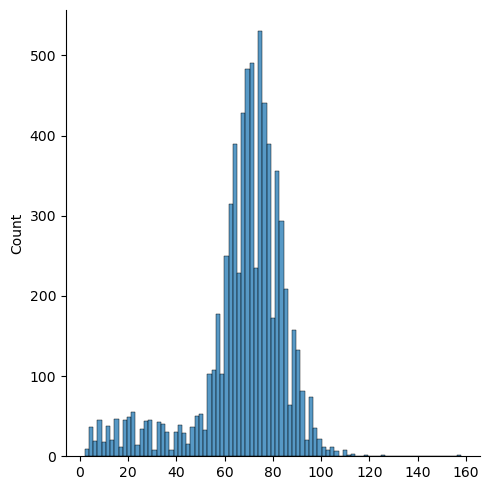

In [25]:
sns.displot(char_count)

## Check số kí tự

In [15]:
root = 'data/raw/tuandat/Data'
char_count = []
invalid_img = []
for path in os.listdir(root + '/img'):
    imgpath = root + '/img/' + path
    labelpath = root + '/text/' + os.path.splitext(path)[0] + '.txt'

    # Đọc text
    with open(labelpath, 'r') as f:
        content = f.readline().rstrip('\n').strip()
        # if '-' in content:
        #     print(path)
        # char_list.update(set(content))
        char_count.append(len(content))
        
    # Đọc img
    img = Image.open(imgpath).convert('L')
    w, h = img.size
    # size.append(img.size)
    if w / h > 512/32:
        print(imgpath)
        invalid_img.append(imgpath)
    

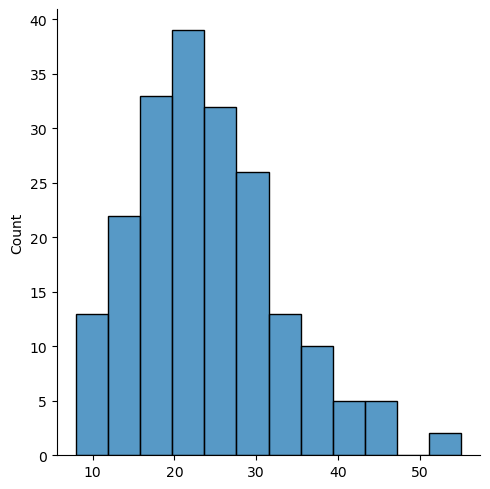

In [16]:
sns.displot(char_count)

## Check hình ảnh

In [17]:
from dataset import DatasetImg
from PIL import Image
import os
import matplotlib.pyplot as plt

from utils import utils

['Bình minh rực rỡ nhuộm hồng bầu trời.\n']


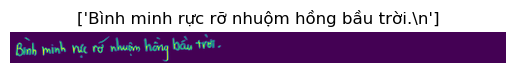

['Tiếng chim hót líu lo chào đón ngày mới.\n']


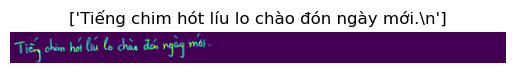

['Gió thoang thoảng mang theo hương hoa cỏ.\n']


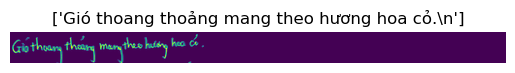

['Bông hoa khoe sắc thắm dưới ánh nắng mai.']


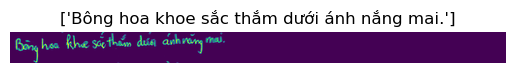

['Bầy ong chăm chỉ hút mật ong từ hoa.\n']


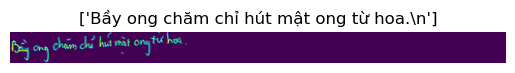

['Dòng suối róc rách chảy qua những tảng đá.\n']


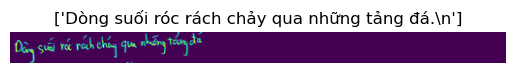

['Bầu trời xanh biếc điểm xuyết mây trắng.\n']


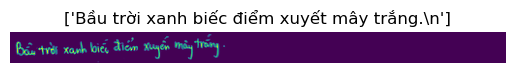

['Cánh đồng lúa xanh mướt trải dài chân trời.\n']


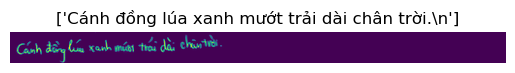

['Chim bay lượn tự do trên bầu trời cao.\n']


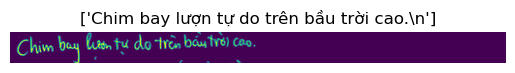

['Ngôi nhà nhỏ bình yên bên sườn đồi.\n']


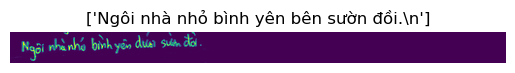

['Khói lam bay lên từ mái nhà tranh.\n']


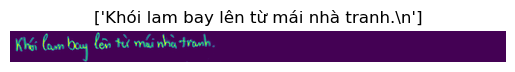

['Dòng sông quê êm đềm chảy qua làng.\n']


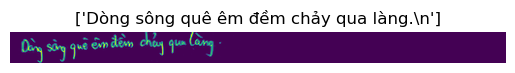

In [19]:
root = 'data/raw/tandat'

for _, path in enumerate(os.listdir(root + '/img')):
    imgpath = root + '/img/' + path
    labelpath = root + '/text/' + os.path.splitext(path)[0] + '.txt'

    img = utils.img_loader(imgpath)
    plt.imshow(img[0])
    with open(labelpath, 'r') as f:
        s = f.readlines()
        print(s)
    plt.title(s)
    plt.axis('off')
    plt.show()
    if _ > 10: break

# Lọc các file

In [9]:
import os

def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            return content
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def delete_file(file_path):
    try:
        os.remove(file_path)
        return
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def count_words(text):
    return len(text.split())

In [37]:
cnt = 0
list_len = []
char_list = set()
root = 'data/1'
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpth = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        with open(labelpth, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            char_list.update(set(content))
            char_count = len(content)
            list_len.append(char_count)
            
        if char_count in range(51, 96):
            cnt += 1
            # shutil.move(imgpath, 'data/img/') # Di chuyển file 
            # shutil.move(labelpth, 'data/label/') # Di chuyển file 
cnt

6273

In [38]:
l = list(char_list)
char = ''.join(sorted(l))
char


' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [39]:
len(char)

154

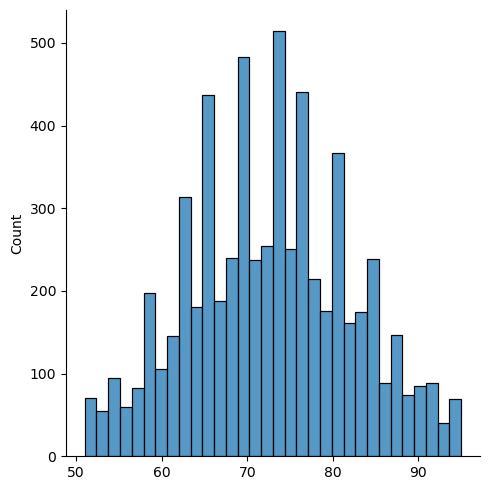

In [5]:
sns.displot(list_len)

# Visulization

In [3]:
from dataset import DatasetImg
from PIL import Image
import os
import matplotlib.pyplot as plt

from utils import utils

['Bình minh rực rỡ nhuộm hồng bầu trời.\n']


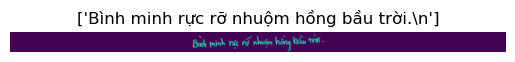

['Tiếng chim hót líu lo chào đón ngày mới.\n']


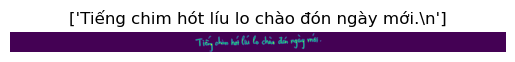

In [6]:
path = 'data/raw/tandat/'
for i in range(2):
    img = utils.img_loader(path + 'img/tandat_data_000' + str(i) + '.png', imgW = 800)
    plt.imshow(img[0])
    with open(path + 'text/tandat_data_000' + str(i) + '.txt', 'r') as f:
        s = f.readlines()
        print(s)
    plt.title(s)
    plt.axis('off')
    plt.show()

In [19]:
def display(imgdata, num = 5, raw = True):
    if raw:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = Image.open(imgdata + '/' + imgpath)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            if i > num : break
    else:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = utils.img_loader(imgdata + '/' + imgpath)
            plt.imshow(img[0])
            plt.axis('off')
            plt.show()
            if i > num : break

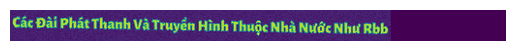

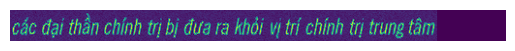

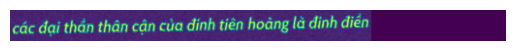

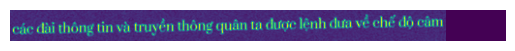

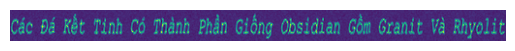

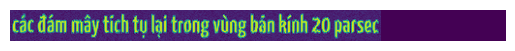

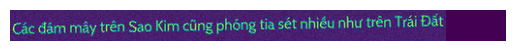

In [20]:
display('data/data2/train/img', raw = False)

# Tạo dataframe lưu thong tin data

In [3]:
os.listdir('data/data1/img').__len__()

6273

In [4]:
data = {
    'img_name': [],
    'text': []
}

for name in os.listdir('data/data1/img'):
    with open('data/data1/label/' + os.path.splitext(name)[0] + '.txt' ) as f:
        content = f.readline().rstrip('\n').strip()
    data['img_name'].append(name)
    data['text'].append(content)

In [5]:
df = pd.DataFrame(data)

In [7]:
df.to_csv('ground_truth.csv')